The quantitative introduction lectures

# Lecture 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option('precision', 2)
%precision 2

'%.2f'

# Learning goals

In this lecture you will learn about:
* The difference between numerical and categorical variables.
* Visualizations of the distribution of a numerical variable: Histograms and Boxplots.
* Measures of the central tendency of a numerical variable: Mean and Median.
* Measures of the dispersion of a numerical variable: Variance, Standard Deviation and Interquartile Range.
* Percentiles.
* Visualizations of the relationship between two variables: Scatter Plots, Conditional Histograms and Conditional Boxplots.

# Description of the data used for the quantitative introduction lectures

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AsgerAndersen/basecamp_stats_intro/master/origin_mobility.csv') 
data.head()

,name,state,south,british,german,mobility
0,Johnson City,Tennessee,True,43.81,13.41,6.22
1,Morristown,Tennessee,True,40.15,9.91,5.37
2,Middlesborough,Tennessee,True,41.81,8.36,7.26
3,Knoxville,Tennessee,True,39.54,12.63,5.63
4,Winston-Salem,North Carolina,True,37.26,15.41,4.48


The paper [American geography of opportunity reveals European origins](https://www.pnas.org/content/116/13/6045) (Berger & Engzell, 2019) studies intergenerational economic mobility in the US. In particular, it studies the relationship between geographical areas' share of descendants from various European countries and their level of intergenerational mobility. The data, which we are going to use during the quantitative introduction lectures, is a subset of the data used in the paper - the full dataset can be found [here](https://osf.io/5w7kf/files/). The [unit of observation](https://en.wikipedia.org/wiki/Unit_of_observation) is the [commuting zone](https://www.ers.usda.gov/data-products/commuting-zones-and-labor-market-areas/), which is a geographical unit constructed to divide the US into local labor markets. The observed variables are:

* **name & state:** The commuting zone's name & state.
* **south:** Whether the communiting zone's state belongs to the southern [region](https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf) of the US.
* **british & german:**: The share of the commuting zone's population that have these self-identified ancenstries according to the 1980 US census.
* **mobility:** The share of individuals born in the commuting zone to parents with income in the lowest fifth part of the US population, who ends up with income in the highest fifth part. (The paper also studies several other measures of mobility, but these are not part of the data which we are going to use).

---

**Exercise 1.1:** A [categorical variable](https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-numerical-variables/) classifies observations according to some list of categories with no intrinsic ordering (e.g. gender, nationality and house-ownership), whereas a [numerical variable](https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-numerical-variables/) measures something that is numerical of nature (e.g. height, income and number of children). Which variables in the loaded data are categorical and which ones are numerical?

---

**Exercise 1.2:** What are the variables' values for the observation with index 3? What are the meaning of these values, e.g. what does it mean that $british=39.54$ for this observation?

---

# Visualization of distributions: Histograms

A [histogram](https://en.wikipedia.org/wiki/Histogram) visualizes how a numerical variable's values are distributed. The histogram divides the variable's range - the interval between the variable's minimum and maximum values - into a series of bins and counts how many of the variable's values that fall into each of the bins. Watch [this video](https://www.youtube.com/watch?v=qBigTkBLU6g), if further explanation is needed.

The plots below are histograms of the *bristish*, *german* and *mobility* variables.

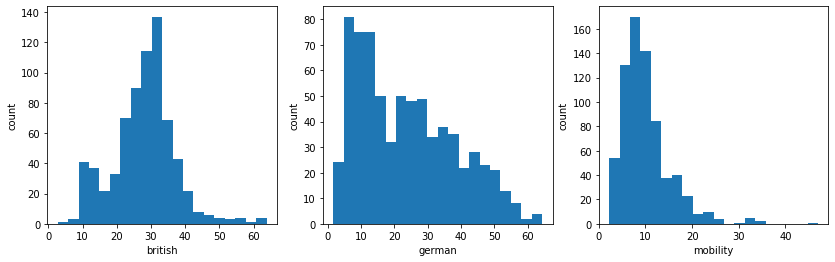

In [3]:
num_vars = ['british','german','mobility']
f_hists, axes_hists = plt.subplots(1, 3, figsize=(14, 4))
for ax, name in zip(axes_hists.flatten(), num_vars):
    ax.hist(data[name],bins=20)
    ax.set(xlabel=name, ylabel='count')

---

**Exercise 1.3:** Compare the histograms of the *british* and *german* variable. Next, compare the map B and E in Figure 1 of the research article. Map B and E displays, respectively, the values of the *german* and *british* variables across the US. The following questions can be answered by only looking at the histograms. However, you should try to relate your answers to the way the maps look and ask yourself how the information, which can be inferred from the shape of the histograms, can also be inferred from the maps.
* What is - approximately - the most normal *british* population share among the commuting zones? Same question for the *german* population shares. 
* Which of the variables has most of its values concentrated in the lower end of its range, and which has most of its values concentrated in the middle of its range? 
* What would you say are the most interesting real-world differences between the distributions of *british* and *german* population shares that can be inferred from the different shapes of the *british* and *german* histograms?
* What would you say are the advantages and disadvantages of displaying the distribution of the variables on the histograms instead of on the maps?

---

# Measures of central tendency: Mean and median

The [mean](https://en.wikipedia.org/wiki/Arithmetic_mean) and [median](https://en.wikipedia.org/wiki/Median) are two measures of the [central tendency](https://en.wikipedia.org/wiki/Central_tendency) - more colloquially, the middle - of a numerical variable. A central tendency measure can be thought of as an attempt of finding a single number that is representative for the entire distribution of the variable.

## Mean

The [mean](https://en.wikipedia.org/wiki/Arithmetic_mean) is also known as the average and is defined as the sum divided by the count. 

The formula for the mean $\bar{x}$ of the $n$ values $x_1,...,x_n$ can be written as:

<p style="text-align: center;"> $\bar{x} = \frac{x_1+x_2+...+x_n}{n}$ </p>

**Exercise 1.4:** Let's say that you have collected the yearly income (in 10000 DKK) of six individuals. The incomes are (execute the cell below):

In [4]:
np.random.seed(1558)
incomes = pd.Series(np.random.normal(loc=40,scale=7.5,size=6,))
incomes

0    42.43
1    39.37
2    39.10
3    47.80
4    52.48
5    32.45
dtype: float64

Try to calculate the mean income (in 10000 DKK) of the six individuals. Execute the cell below to see, if your calculation is correct.

In [5]:
incomes.mean()

42.27

You have now collected data on one individual more. This individual has a yearly income of 5 million DKK. Below are the incomes, when this new individual is included in the data.

In [6]:
incomes_incl_high_earner = incomes.append(pd.Series([500]))
incomes_incl_high_earner

0     42.43
1     39.37
2     39.10
3     47.80
4     52.48
5     32.45
0    500.00
dtype: float64

What is the mean yearly income when the new individual is included? Execute the cell below to see, if your calculation is correct.

In [7]:
incomes_incl_high_earner.mean()

107.66

Why does the income of the last individual influence the mean income so much? What does this say about the mean as a measure of the middle of a numerical variable? *Hint 1:* As the good old statitics joke go: Bill Gates walked into a bar and suddenly everybody was - on average - a millionaire. *Hint 2 (use if in doubt):* Read the last paragraph of the introduction in the [wikipedia article about the mean](https://en.wikipedia.org/wiki/Arithmetic_mean).

---

## Median

The [median](https://en.wikipedia.org/wiki/Median) is the value that is in the middle of the variable in the sense that half of the values are smaller than the median and half of the values are larger. The median can be calculated by first sorting the variable and then picking the value in the middle. If the variable contains an even number of values, two numbers are in the middle, and the median is calculated as the average of these two numbers. Watch [this video](https://www.youtube.com/watch?v=0SYsi38XucI), if further explanation is needed.

---

**Exercise 1.5:** Calculate the median of the incomes from exercise 1.2, both with and without the individual with the 5 million income. Execute the cells below to see, if you are correct.

In [8]:
incomes.median()

40.90

In [9]:
incomes_incl_high_earner.median()

42.43

Why is the median not influenced very much by including the individual with the unusually high income?

---

The green and brown lines on the histograms below are, respectively, the mean and median of each of the variables.

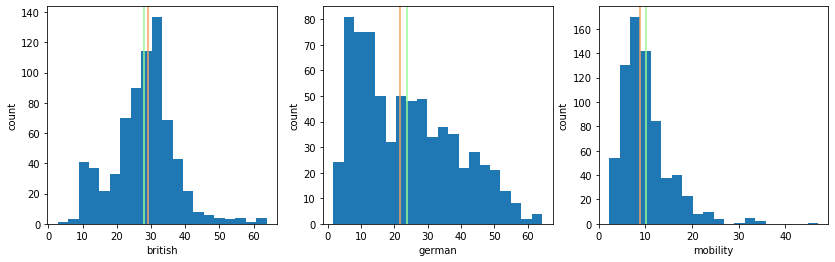

In [10]:
for ax, name in zip(axes_hists.flatten(), num_vars):
    ax.axvline(data[name].mean(),color='palegreen')
    ax.axvline(data[name].median(),color='sandybrown')
f_hists


**Exercise 1.7:** Use the histograms above to guess the value of the mean and median of each of the variables. Execute the cell below to see, if you were approximately correct.


In [11]:
d_descr = data.describe(percentiles=[0.05,0.25,0.5,0.75,0.95]).drop('count').T
d_descr = d_descr.rename(columns={'50%':'median'})
d_descr[['mean','median']]

,mean,median
british,28.01,29.05
german,23.69,21.68
mobility,10.03,8.94


# Percentiles

The q'th [percentile](https://en.wikipedia.org/wiki/Percentile) of a variable is the value p, where q percent of the variable's values are below p. For instance, the median is the 50'th percentile. Likewise, the 20'th percentile of a variable is the value, which 20 percent of the variable's values are below. Watch [this video](https://www.youtube.com/watch?v=IFKQLDmRK0Y), if further explanation is needed.

---

**Exercise 1.8:** What percentage of a variable's values is below the 75'th percentile? What percentage is *above* the 40'th percentile? In general, what percentage is above the q'th percentile?

---

The brown lines in the histograms below are the variables' 25'th percentiles, medians and 75'th percentiles (the green lines are still the means). The 25'th and 75'th percentiles are also called the first and third quartiles, and the range between them is called the interquartile range.

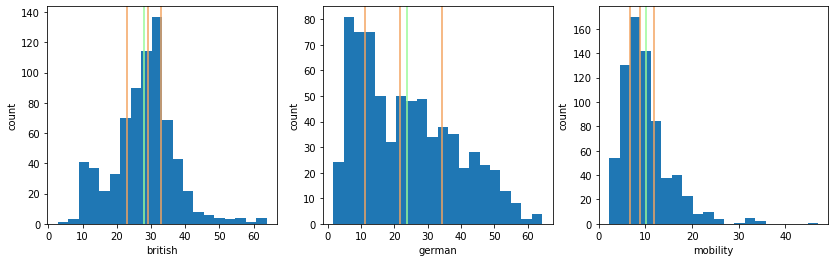

In [12]:
for ax, name in zip(axes_hists.flatten(), num_vars):
    ax.axvline(data[name].quantile(0.25),color='sandybrown')
    ax.axvline(data[name].quantile(0.75),color='sandybrown')
f_hists

**Exercise 1.9:** Use the *german* histogram above to guess the interquartile range of the *german* variable. Execute the cell below to see if you were approximately correct.

First and third quartiles (25'th and 75'th percentile) of the *german* variable:

In [13]:
d_descr.loc['german',['25%','75%']]

25%    11.12
75%    34.24
Name: german, dtype: float64

Interquartile range of the *german* variable:

In [14]:
(d_descr.loc['german','75%']-d_descr.loc['german','25%']).round(2)

23.12

**Exercise 1.10:** In general, what percentage of a variable's values are lying between the variable's first and third quartiles?

--- 

# Visualization of distributions: Boxplots

The boxplot is another visualization of how a variable's values are distributed. The plots below are the boxplots of the numeric variables from the dataset presented above:

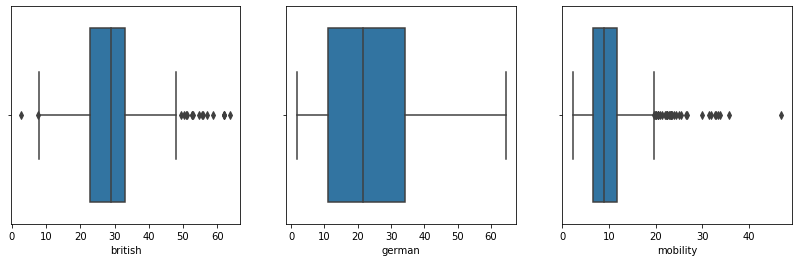

In [15]:
f_boxs, axes_boxs = plt.subplots(1, 3, figsize=(14, 4))
for ax, name in zip(axes_boxs.flatten(), num_vars):
    sb.boxplot(data[name],ax=ax)
    ax.set(xlabel=name, ylabel='')

The middle line in the box is the median. The ends of the box are the first and third quartiles. The box thus visualizes the same information as the brown lines in the histograms above. The dots in the boxplot are values that are judged to be outliers (extreme values) in the distribution. The standard definition of an outlier is that the value is further away from the first or third quartile than 1.5 times the interquartile range. For instance, the first and third quartiles of the *mobility* variable are equal to (compare with the *mobility* boxplot above):

In [16]:
d_descr.loc['mobility',['25%','75%']]

25%     6.59
75%    11.82
Name: mobility, dtype: float64

Therefore, the interquartile range of the *mobility* variable is equal to

In [17]:
(d_descr.loc['mobility','75%'] - d_descr.loc['mobility','25%']).round(2)

5.22

and a value in the mobility variable is therefore defined as an outlier, if it is smaller than

<p style="text-align: center;"> $6.59 - 1.5\cdot 5.22 = -1.24$</p>

or larger than

<p style="text-align: center;"> $11.82 + 1.5\cdot 5.22 = 19.65$</p>

---

**Exercise 1.11:** Look at the boxplot of the mobility variable. Are there any small outliers? Are there any large outliers?

---

The lines sticking out of the box in a boxplot are called the whiskers. They mark the minimum and maximum non-outlier-values in the variable.

---

**Exercise 1.12:** Look at the boxplot of the variable *british*. What does it look like the variable's median, 25'th and 75'th percentile are equal to? Execute the cell below to see if you were approximately correct.

---

In [18]:
d_descr.loc['mobility',['25%','median','75%']]

25%        6.59
median     8.94
75%       11.82
Name: mobility, dtype: float64

Try to calculate the borders below and above which values of the *british* variable are judged to be outliers. Execute the cell below to see, if you were correct.

In [19]:
brit_p25 = d_descr.loc['british','25%']
brit_p75 = d_descr.loc['british','75%']
brit_iqr = brit_p75 - brit_p25
brit_lower = brit_p25 - 1.5*brit_iqr
brit_upper = brit_p75 + 1.5*brit_iqr
(brit_lower.round(2), brit_upper.round(2))

(7.84, 47.98)

**Exercise 1.13:** Compare the boxplots of the *british* and *german* variables. What would you say are the most important differences between the distribution of british and german population shares that you can read off from their boxplots? What does it say about the difference between the *british* and *german* population shares that the *german* boxplot has a wider box than the *british* one?

---

The plots below let you compare the histograms and boxplots of the *british*, *german* and *mobility* variables.

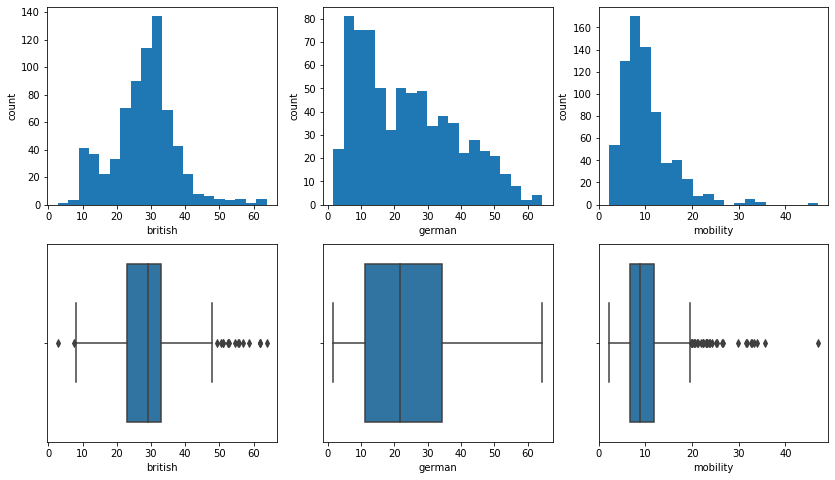

In [20]:
f_hists_boxs, axes_hists_boxs = plt.subplots(2, 3, figsize=(14, 8))
for ax, name in zip(axes_hists_boxs[0,:].flatten(), num_vars):
    ax.hist(data[name],bins=20)
    ax.set(xlabel=name, ylabel='count')
for ax, name in zip(axes_hists_boxs[1,:].flatten(), num_vars):
    sb.boxplot(data[name],ax=ax)
    ax.set(xlabel=name, ylabel='')

**Exercise 1.14:** Compare the histograms and boxplots above. What would you say are the advantages and disadvantages of using a boxplot instead of a histogram to vizualise the distribution of a numerical variable?

---

## Measures of dispersion: Interpercentile range, variance and standard deviation

A variable's [dispersion](https://en.wikipedia.org/wiki/Statistical_dispersion) is the extent to which the variable's values are spread out across a wide range in contrast to being concentrated around a single value.

---

**Exercise 1.15:** Look at the histograms and boxplots above. Which of the variables would you say looks most dispersed?

---

We have already encountered one measure of a variable's dispersion, namely its interquartile range. Another measure that is less intuitive, but much more useful in many methodological contexts, is the variable's [variance](https://en.wikipedia.org/wiki/Variance). The variance $\sigma^2(x)$ of a variable $x$ is defined as the average of the squared deviations of the values from the mean. If $x_1,x_2,...,x_n$ denotes the variable's values and $\bar{x}$ denotes its mean, the formula for the variance can be written as:

<p style="text-align: center;"> $\sigma^2(x) = \frac{(x_1-\bar{x})^2 + (x_2-\bar{x})^2 + ... + (x_n-\bar{x})^2}{n}$ </p>

---

**Exercise 1.16:** Try to calculate the variance of the incomes from exercise 1.4 (shown by executing the first cell below). *Hint:* Watch [this video](https://www.youtube.com/watch?v=E4HAYd0QnRc) if you need to watch an example of how to calculate the variance (the variance calculation starts at [4:30](https://youtu.be/E4HAYd0QnRc?t=271)). Execute the second cell below to see if you were correct.

In [21]:
incomes

0    42.43
1    39.37
2    39.10
3    47.80
4    52.48
5    32.45
dtype: float64

In [22]:
incomes_var = (((incomes - incomes.mean())**2).sum()/incomes.shape[0]).round(2)
incomes_var

41.62

The standard deviation $\sigma(x)$ of a variable $x$ is the square root of its variance:

<p style="text-align: center;"> $\sigma(x)=\sqrt{\sigma^2(x)}$ </p>

---

**Exercise 1.17:** What is the standard deviation of the incomes? Execute the cell below to see if you were correct.

---

In [23]:
np.sqrt(incomes_var).round(2)

6.45

The next two exercises are a bit more abstract than the previous exercises. If you are in doubt about how to understand and approach the exercises, then just ask.

---

**Exercise 1.18:** Say that the variance of a variable $x$ is larger than the variance of another variable $y$. Does this necessarily imply that the standard deviation of $x$ is also larger than the standard deviation of $y$? If you think that it is the case, give an argument why. If you don't think it is the case, try to come up with a counter example.

---

**Exercise 1.19:** Say that the variance of a variable $x$ is larger than the variance of another variable $y$. Does this necessarily imply that the interquartile range of $x$ is also larger than the interquartile range of $y$? If you think that it is the case, give an argument why. If you don't think it is the case, try to come up with a counter example.  *Hint (use if in doubt):* The relation between the variance and interquartile range is - to some extent - similar to the relation between the mean and median. The interquartile range is defined via percentiles and therefore not influenced by outliers, whereas the variance can be highly influenced by outliers.

---

# Visualization of the relationship between two numerical variables: Scatter plots

So far, you have learned about visualizations and measures that describes the distribution of a single variable. However, social science often investigates the relationship between the distributions of multiple variables. The [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot) visualizes the relationship between the distributions of two numerical variables by displaying the data as points in a coordinate system, where the variables' values determine the positions of the points. Watch [this video](https://www.youtube.com/watch?v=NcgRa0uotXs), if further explanation is needed.

Below are scatter plots of the relationships between the *british*, *german* and *mobility* variables. The points are plotted somewhat transparently such that the viewer can get an idea of the concentration of observations in different regions of the coordinate system.

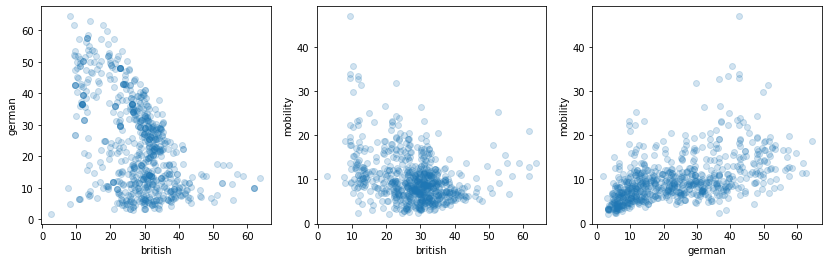

In [24]:
f_scatter, axes_scatter = plt.subplots(1, 3, figsize=(14, 4))
for ax, names in zip(axes_scatter.flatten(), [('british','german'),('british','mobility'),('german','mobility')]):
    ax.scatter(data[names[0]],data[names[1]],alpha=0.2)
    ax.set(xlabel=names[0], ylabel=names[1])

---

**Exercise 1.20:** Look at the scatter plot of the relationship between the *british* and *german* population shares (the plot to the left). 

* Identify the point corresponding to the commuting zone with the largest british population share. What is the german population share of this commuting zone?
* Why does it make sense that there are no points in the upper right region of the plot?

---

**Exercise 1.21:** Look at the two scatter plots of the relationships between the *mobility* variable and - respectively - the *british* and *german* population shares (the plots in the middle and to the right). Would you say that commuting zones' mobility tend to increase or decrease with the zones' british population shares? What about the german population shares? 

---

# Visualization of the relationship between a categorical and a numerical variable: Conditional histograms and boxplots

The plot to the left below shows the histograms of the southern and non-southern commuting zones in the US. Likewise, the plot to the right shows the boxplots of the southern and non-southern commuting zones in the US. 

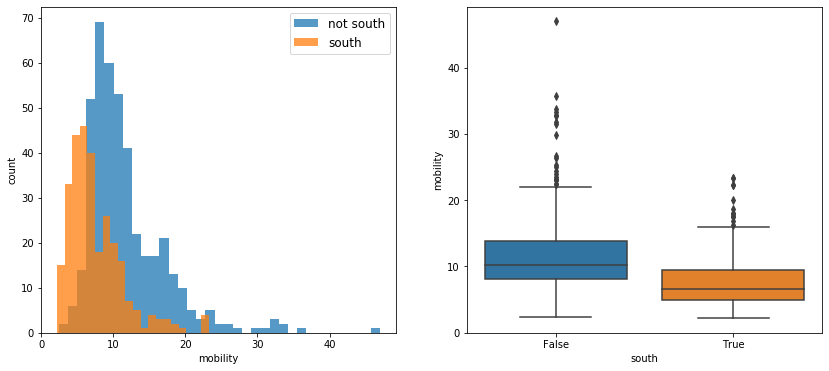

In [25]:
f_cond, axes_cond = plt.subplots(1, 2, figsize=(14, 6))
axes_cond[0].hist(data.loc[~data['south'],'mobility'],alpha=0.75,bins=35,label='not south')
axes_cond[0].hist(data.loc[data['south'],'mobility'],alpha=0.75,bins=20,label='south')
axes_cond[0].legend(loc='upper right',fontsize=12)
sb.boxplot('south','mobility',data=data,ax=axes_cond[1])
axes_cond[0].set(xlabel='mobility', ylabel='count')
axes_cond[1].set(ylabel='mobility');

**Exercise 1.22:** Do the southern commuting zones tend to have lower or higher mobility than the non-southern commuting zones? Do there exist a southern commuting zone with higher mobility than a non-southern commuting zone?

**Exercise 1.23:** Compare the plot wiht the histograms and the plot with the boxplots. What would you say are the advantages and disadvantages of using boxplots instead of histograms to visualize the relationship between a categorical and a numerical variable?

# Extra

**Extra exercise:** Use the visualizations and statistical measures that you have learned in this lecture to explore the data you are working with in the programming part of this course. You will need to load the data yourself in the cell below. Then make new code cells and try to make the code from above work on this data.

In [ ]:
path = '' #insert path to the csv-file with the data from the programming part of the course
data = pd.read_csv(path)
data.head()

# References

Berger, T. & Engzell, P. (2009). "American geography of opportunity reveals European origins". PNAS, 116(13), 6045-6050. https://doi.org/10.1073/pnas.1810893116